<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/My Drive/Colab Notebooks/CS 3: Facebook Friend /2.Featurization/storage_sample_stage4.h5', 'train_df',mode= 'r')
df_final_test = read_hdf('/content/drive/My Drive/Colab Notebooks/CS 3: Facebook Friend /2.Featurization/storage_sample_stage4.h5', 'test_df', mode='r')

In [24]:
df_final_train.shape

(100002, 57)

In [0]:
df_final_train

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node' , 'destination_node', 'indicator_link'],axis = 1,inplace =True)
df_final_test.drop(['source_node' , 'destination_node', 'indicator_link'], axis=1,inplace =True)

In [28]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,prefer_Attach_followers,prefer_Attach_followees,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0,0,0.000000,0.000000,11,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,66,120,-1.666295e-13,4.613796e-13,1.043040e-05,6.678024e-13,2.451089e-13,3.584945e-12,-2.038018e-11,5.397885e-13,1.068942e-06,1.192461e-12,2.279487e-12,3.581202e-12,-7.216142e-13,3.925934e-13,1.983700e-06,1.545087e-13,8.108424e-13,1.719704e-14,-1.355368e-12,4.675288e-13,1.128585e-06,6.616688e-14,9.771064e-13,4.160011e-14
1,0,0,0.000000,0.196116,8,2,13,2,0,1,0.756304,1,1,2,0.577350,0.267261,0.844612,0.154303,1.421962,1.111873,2.293868e-06,2.250132e-07,0.000761,0.000739,1.047118e-17,5.013635e-18,5.832576e-17,1.105853e-16,16,26,-8.247975e-14,1.612952e-10,1.380047e-11,1.207922e-13,2.558752e-14,1.930801e-16,-1.316362e-14,4.246190e-11,6.320784e-14,1.152957e-13,2.018114e-14,9.251083e-17,-4.480853e-13,2.092319e-09,1.464629e-12,5.471329e-15,7.976031e-15,1.087137e-15,-2.553837e-15,4.252794e-12,1.172448e-12,5.124718e-15,1.912426e-14,2.061208e-15
2,0,0,0.000000,0.160644,44,2,31,5,0,2,1.541562,1,1,4,0.577350,0.176777,0.754127,0.102062,1.331477,0.930904,3.628995e-06,1.968740e-07,0.000906,0.000740,6.627109e-15,2.148367e-15,4.104686e-14,1.503694e-15,88,155,-3.181738e-11,3.111732e-10,1.227007e-05,5.021346e-12,3.266726e-11,1.222653e-13,-1.195176e-12,8.554662e-13,1.388488e-06,1.504902e-13,9.505540e-13,3.963575e-14,-2.637042e-11,3.183453e-11,1.189522e-05,3.138564e-12,1.947235e-11,7.650710e-13,-1.230946e-12,3.220195e-12,3.525360e-07,1.663437e-13,8.744359e-13,2.802746e-14
3,0,0,0.000000,0.000000,7,6,9,5,0,0,0.000000,1,1,4,0.377964,0.316228,0.694192,0.119523,1.072157,1.010420,7.657847e-07,6.287189e-07,0.000758,0.000755,6.833002e-14,5.218763e-14,2.382010e-15,2.274798e-15,42,45,-4.647114e-11,5.607015e-13,6.086731e-10,4.102511e-13,1.091337e-12,1.260641e-12,-2.692430e-11,1.519497e-13,7.172418e-10,8.419574e-10,5.210436e-12,9.628256e-13,-4.454905e-12,7.077799e-13,4.306799e-10,8.167488e-12,3.036805e-12,4.439844e-14,-4.138429e-12,2.551385e-13,1.510677e-09,1.795237e-13,2.982945e-13,4.239982e-14
4,0,0,0.013363,0.083333,14,20,8,18,1,1,0.582749,1,1,2,0.218218,0.333333,0.551551,0.072739,0.769769,0.884885,2.353896e-06,1.743405e-06,0.000785,0.000811,1.562815e-15,1.940163e-13,1.138432e-12,2.623107e-14,280,144,-4.539502e-11,6.313935e-12,8.334387e-10,3.095656e-12,8.503847e-13,2.883296e-14,-1.015118e-10,3.635732e-11,8.504424e-10,2.378530e-11,1.596485e-11,3.579468e-12,-8.668443e-10,7.712788e-12,5.273594e-09,8.572581e-10,1.625632e-11,2.121933e-11,-1.729572e-09,1.192562e-11,1.420924e-09,6.553062e-11,2.979892e-11,4.889229e-13


Estimators =  10 Train Score 0.9197119786897527 test Score 0.9107400967802752
Estimators =  50 Train Score 0.9229966502134054 test Score 0.9162611176371875
Estimators =  100 Train Score 0.9231106792464658 test Score 0.9162816096782324
Estimators =  250 Train Score 0.9245192307692308 test Score 0.9178447642054406
Estimators =  450 Train Score 0.9252555232740421 test Score 0.9187225733302539


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

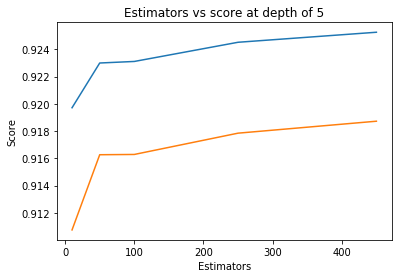

In [33]:
estimators = [10,50,100,250,450]
train_scores= []
test_scores = []
for i in estimators:
  clf = RandomForestClassifier( n_estimators =i, criterion ='gini', max_depth =5, min_samples_split =120,min_samples_leaf =52 , 
                               min_weight_fraction_leaf= 0.0, max_features ='auto', max_leaf_nodes =None,
                               min_impurity_decrease=0.0,min_impurity_split =None, bootstrap=True,
                               n_jobs =-1, random_state=25,verbose =0,class_weight =None,
                               warm_start=False)
  clf.fit(df_final_train,y_train)
  train_sc = f1_score(y_train,clf.predict(df_final_train))
  test_sc = f1_score(y_test,clf.predict(df_final_test))
  test_scores.append(test_sc)
  train_scores.append(train_sc)
  print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8971163599478336 test Score 0.8757555972113987
depth =  9 Train Score 0.958527888181623 test Score 0.9236023273463193
depth =  11 Train Score 0.9617626676450205 test Score 0.9239013481297075
depth =  15 Train Score 0.9652990426971322 test Score 0.9253221418478604
depth =  20 Train Score 0.965959566185215 test Score 0.9258385302545088
depth =  35 Train Score 0.9659545925730199 test Score 0.9258705314823786
depth =  50 Train Score 0.9659545925730199 test Score 0.9258705314823786
depth =  70 Train Score 0.9659545925730199 test Score 0.9258705314823786
depth =  130 Train Score 0.9659545925730199 test Score 0.9258705314823786


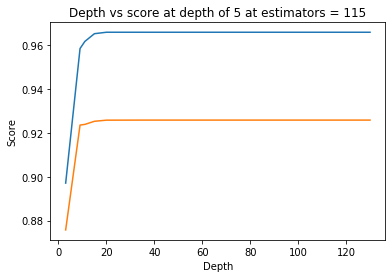

In [34]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [39]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators" : sp_randint(105,125),
              'max_depth': sp_randint(10,15),
              'min_samples_split': (110,190),
              'min_samples_leaf': (25,65)}
clf = RandomForestClassifier(random_state =25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter =5, cv=10, scoring ='f1',random_state=25,return_train_score=True)
rf_random.fit(df_final_train,y_train)


print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96486622 0.96463871 0.96454738 0.96118186 0.96327941]
mean train scores [0.96622594 0.96553179 0.96555162 0.96189843 0.96396057]


In [40]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=110,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [0]:
clf =RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=110,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pre = clf.predict(df_final_train)
y_test_pre = clf.predict(df_final_test)

In [43]:
print('Train f1 score: ', f1_score(y_train,y_train_pre))
print('Test f1 score: ', f1_score(y_test,y_test_pre))

Train f1 score:  0.96635799328381
Test f1 score:  0.9221584774646993


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


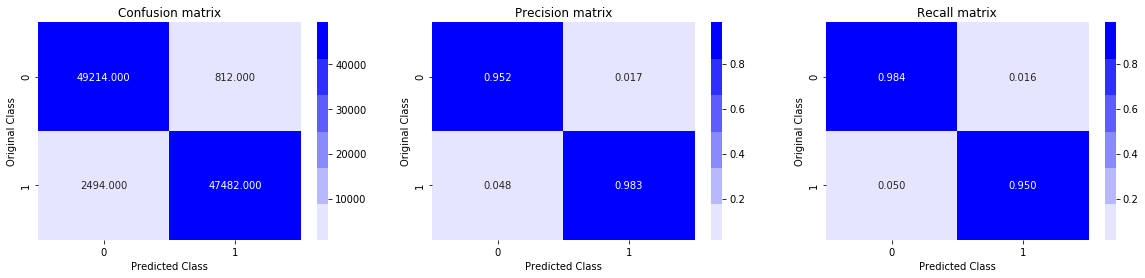

Test confusion_matrix


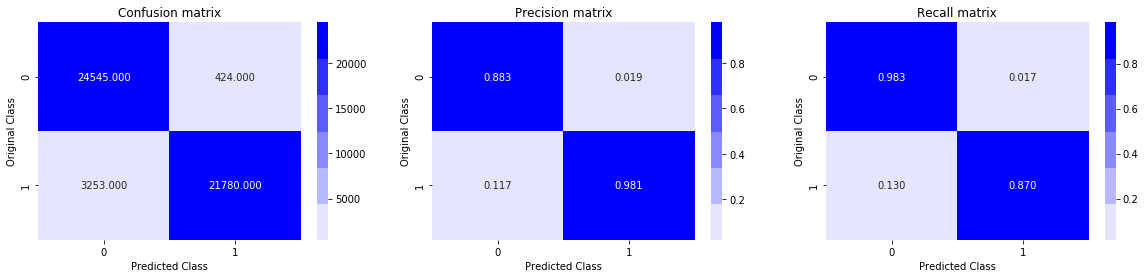

In [46]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pre)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pre)

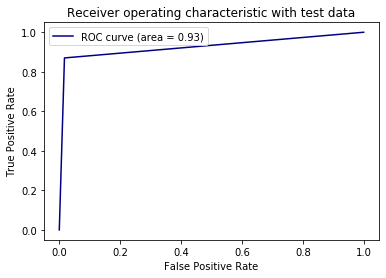

In [48]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pre)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

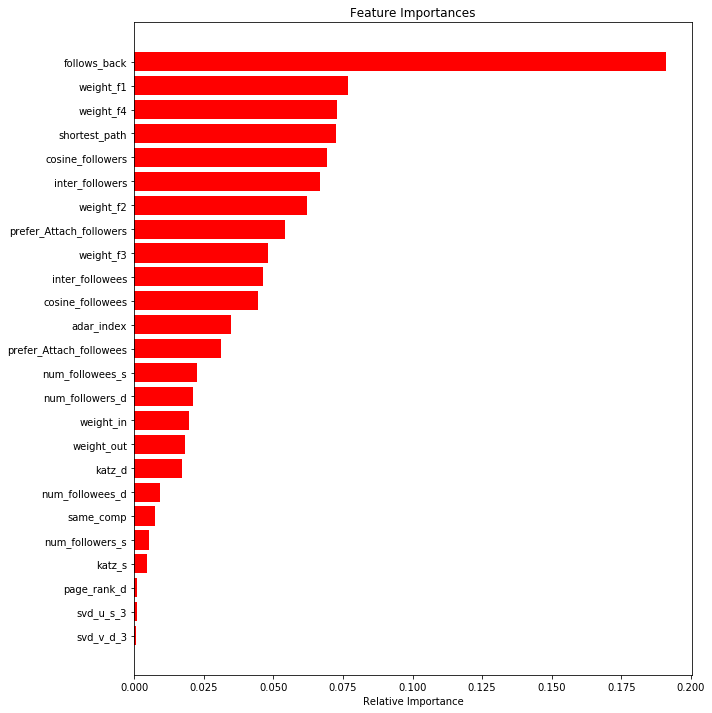

In [49]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Applying XGBOOST 

In [55]:
import xgboost as xgb
clf = xgb.XGBClassifier()
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)
              }
model = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1',random_state=25,
                           return_train_score=True)


model.fit(df_final_train,y_train)
print('mean test scores',model.cv_results_['mean_test_score'])
print('mean train scores',model.cv_results_['mean_train_score'])


mean test scores [0.98094192 0.98090396 0.98080248 0.980911   0.98099241]
mean train scores [1.         1.         0.99544431 0.9976945  0.99784511]


In [56]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=112, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [0]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=112, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [59]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9964592005617132
Test f1 score 0.9260758099031718


Train confusion_matrix


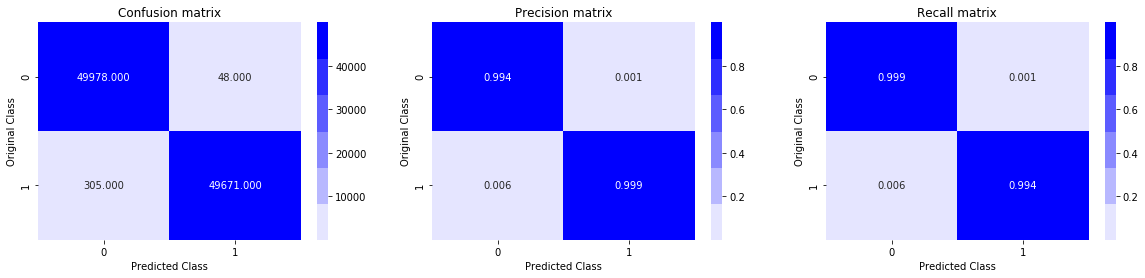

Test confusion_matrix


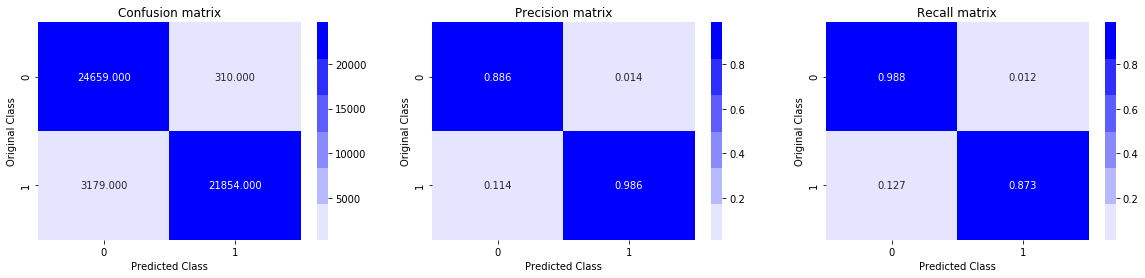

In [60]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

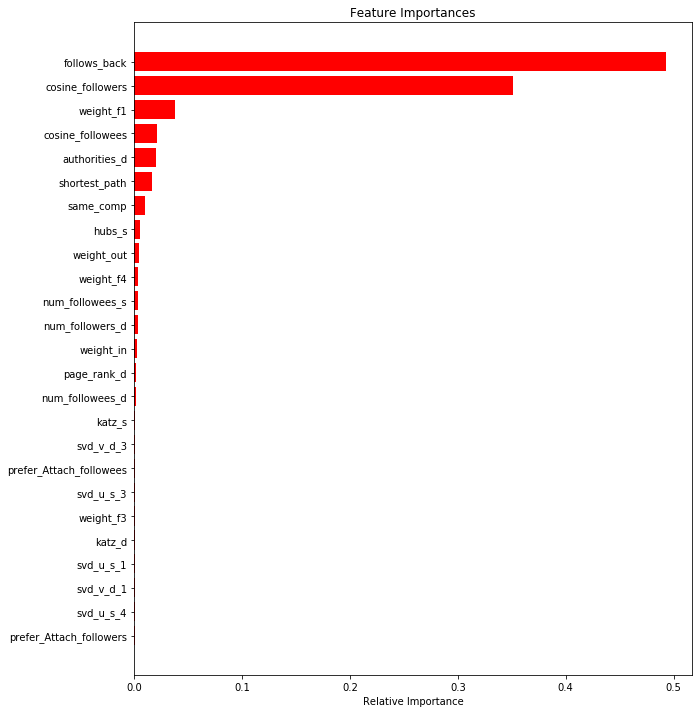

In [61]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()